Missing values in the dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Mean price: 4766729.25
Median price: 4340000.00
Mode price: 3500000


Standard Deviation of price: 1870439.62




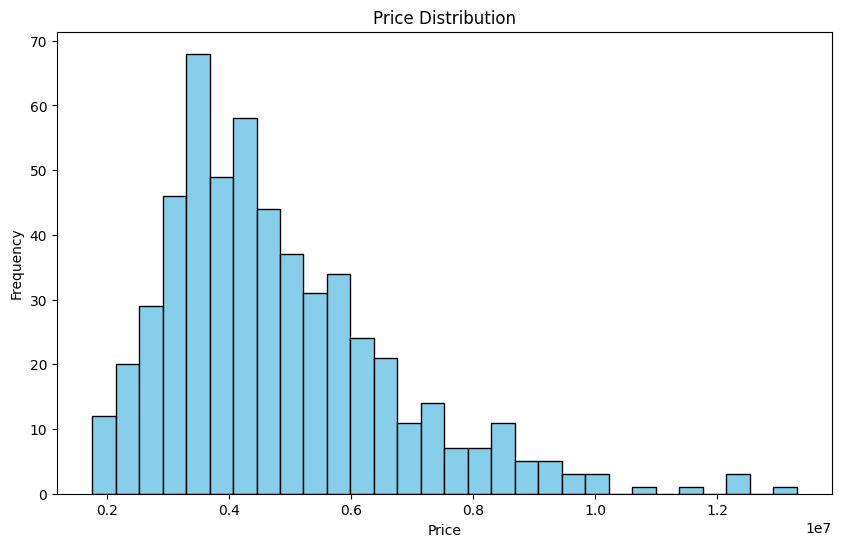



25th Percentile: 3430000.00
50th Percentile (Median): 4340000.00
75th Percentile: 5740000.00
90th Percentile: 7350000.00




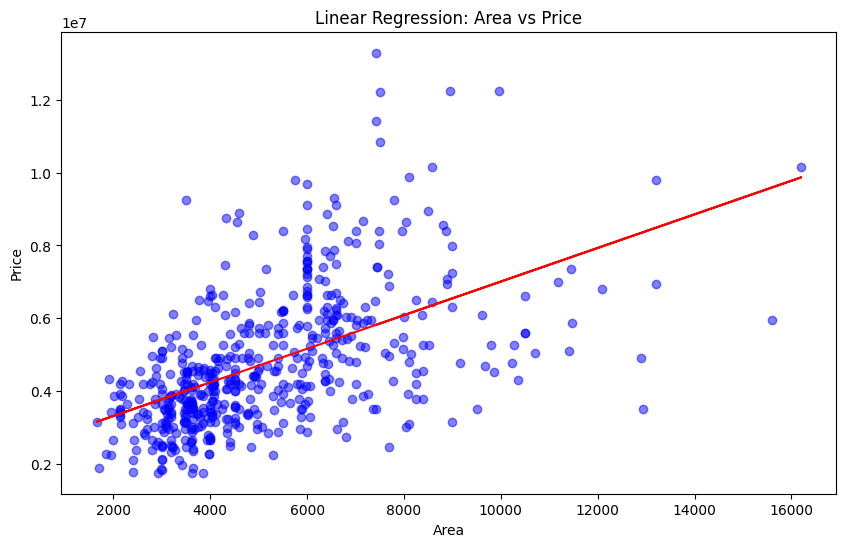

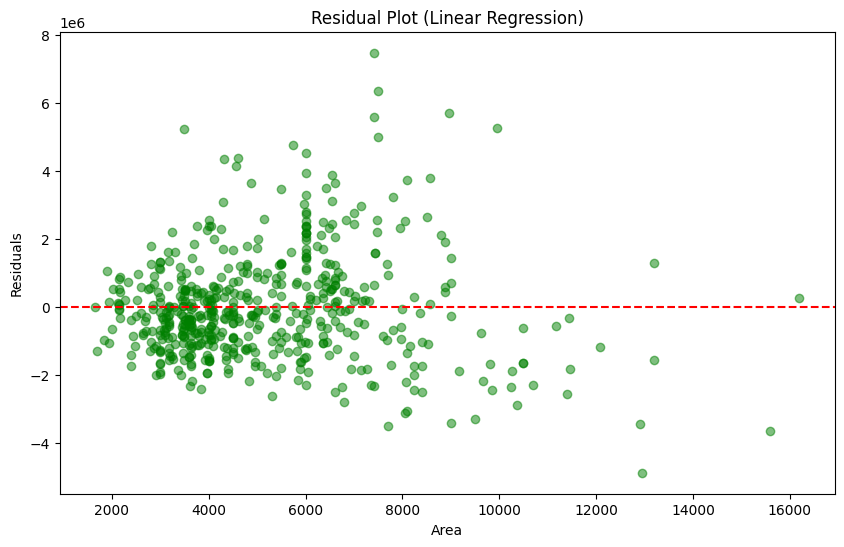

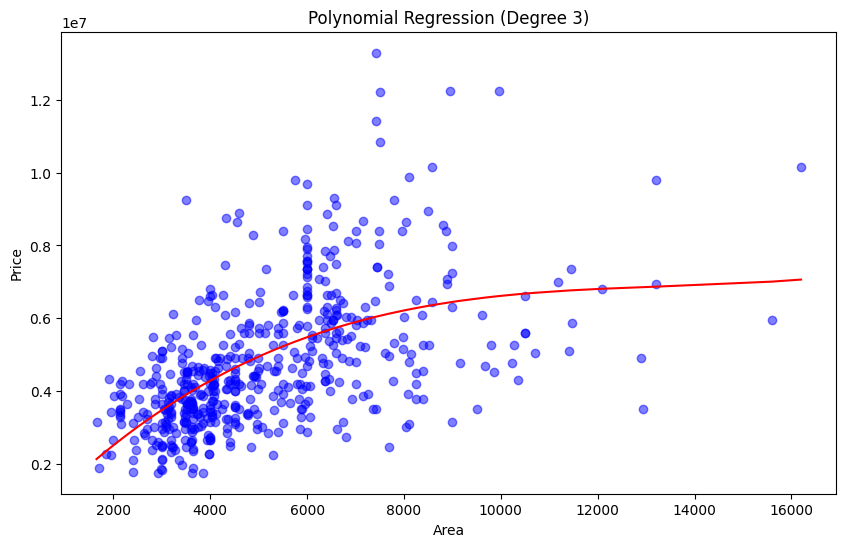

R² Score (Polynomial Regression, Degree 3): 0.325


R² Score (Multiple Regression on Training Set): 0.562
R² Score (Multiple Regression on Test Set): 0.546
MAE (Test Set): 1127483.35
RMSE (Test Set): 1514173.55


First 5 Rows of Scaled Features:
       area  bedrooms  bathrooms   stories   parking
0  1.046726  1.403419   1.421812  1.378217  1.517692
1  1.757010  1.403419   5.405809  2.532024  2.679409
2  2.218232  0.047278   1.421812  0.224410  1.517692
3  1.083624  1.403419   1.421812  0.224410  2.679409
4  1.046726  1.403419  -0.570187  0.224410  1.517692

Means after scaling:
area        -1.564498e-16
bedrooms    -1.825247e-16
bathrooms   -2.607496e-17
stories     -1.303748e-16
parking      0.000000e+00
dtype: float64

Standard deviations after scaling:
area         1.000919
bedrooms     1.000919
bathrooms    1.000919
stories      1.000919
parking      1.000919
dtype: float64


In [1]:
# House Pricing Dataset Project

# 1️⃣ Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# 2️⃣ Load Dataset
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\JupyterNoterbook\Housing.csv")

# 3️⃣ Check for Missing Values
print("Missing values in the dataset:")
print(df.isnull().sum())
print("\n")

# 4️⃣ Mean, Median, Mode
mean_price = np.mean(df['price'])
median_price = np.median(df['price'])
mode_price = df['price'].mode()[0]

print(f"Mean price: {mean_price:.2f}")
print(f"Median price: {median_price:.2f}")
print(f"Mode price: {mode_price}")

print("\n")

# 5️⃣ Standard Deviation 
std_price = np.std(df['price'], ddof=1)
print(f"Standard Deviation of price: {std_price:.2f}")

print("\n")

# 6️⃣ Data Distribution
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

print("\n")

# 7️⃣ Percentiles
percentiles = np.percentile(df['price'], [25, 50, 75, 90])
print(f"25th Percentile: {percentiles[0]:.2f}")
print(f"50th Percentile (Median): {percentiles[1]:.2f}")
print(f"75th Percentile: {percentiles[2]:.2f}")
print(f"90th Percentile: {percentiles[3]:.2f}")

print("\n")

# 8️⃣ Linear Regression
X = df[['area']]
y = df['price']

model_lin = LinearRegression()
model_lin.fit(X, y)
y_lin_pred = model_lin.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_lin_pred, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.show()

# Residual Plot
residuals = y - y_lin_pred
plt.figure(figsize=(10,6))
plt.scatter(X, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.show()

print("\n")

# 9️⃣ Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_poly_pred = model_poly.predict(X_poly)

# Sort values for smooth plotting
sort_idx = np.argsort(X['area'].values.flatten())
X_sorted = X['area'].values.flatten()[sort_idx]
y_poly_pred_sorted = y_poly_pred[sort_idx]

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X_sorted, y_poly_pred_sorted, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Polynomial Regression (Degree 3)')
plt.show()

r2_poly = r2_score(y, y_poly_pred)
print(f"R² Score (Polynomial Regression, Degree 3): {r2_poly:.3f}")

print("\n")

# 🔟 Multiple Regression
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_multi = df[features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_train_pred = model_multi.predict(X_train)
y_test_pred = model_multi.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R² Score (Multiple Regression on Training Set): {r2_train:.3f}")
print(f"R² Score (Multiple Regression on Test Set): {r2_test:.3f}")

# Additional Metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"MAE (Test Set): {mae_test:.2f}")
print(f"RMSE (Test Set): {rmse_test:.2f}")

print("\n")

# 1️⃣1️⃣ Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("First 5 Rows of Scaled Features:")
print(X_scaled_df.head())

print("\nMeans after scaling:")
print(X_scaled_df.mean())

print("\nStandard deviations after scaling:")
print(X_scaled_df.std())


